In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_rel, norm, shapiro, normaltest, ttest_ind
import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv("C:\study-1\Proga-5\child_mortality_data.csv")
df.head()

,Year,Country,Region,Under5_Mortality_Rate,GDP_per_Capita,Healthcare_Spending,Literacy_Rate,Population_Millions
0,2000,Russia,Europe,7.49,13617.356988,649.0430423532314,82.65846625276664,42.975891
1,2000,USA,North America,11.74,22674.347292,547.8361330751346,80.36582307187538,36.028107
2,2000,Germany,Europe,6.73,500.000000,439.24814345794,74.87168879665576,59.427420
3,2000,France,Europe,3.28,876.962987,476.26454201544954,85.67528204687923,7.257554
4,2000,UK,Europe,4.37,16109.225897,534.8837540807781,78.99361310081196,41.249188


In [6]:
print(f"Размер датасета: {df.shape}")
print("\nТипы данных:")
print(df.dtypes)
stats_ru = df.describe()
stats_ru.index = ['Количество', 'Среднее', 'Стд', 'Мин', '25%', '50%', '75%', 'Макс']
stats_ru

Размер датасета: (230, 8)

Типы данных:
Year                       int64
Country                   object
Region                    object
Under5_Mortality_Rate    float64
GDP_per_Capita           float64
Healthcare_Spending       object
Literacy_Rate             object
Population_Millions      float64
dtype: object


,Year,Under5_Mortality_Rate,GDP_per_Capita,Population_Millions
Количество,230.000000,228.000000,229.000000,228.000000
Среднее,2011.000000,19.443728,9573.859993,53.243024
Стд,6.647717,22.486490,8657.867062,32.009540
Мин,2000.000000,1.000000,500.000000,-35.456279
25%,2005.000000,1.000000,3272.545278,34.188996
50%,2011.000000,9.435000,6475.757515,52.624898
75%,2017.000000,31.677500,13143.410233,72.979942
Макс,2022.000000,84.030000,39553.001399,165.581945


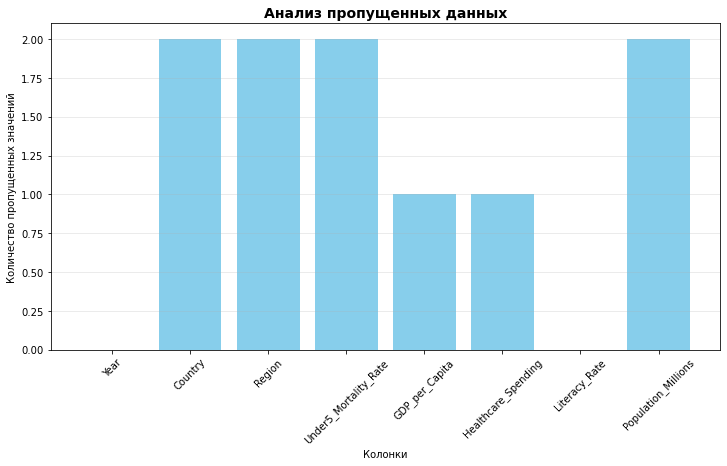

Пропущенные значения по колонкам:
Year: 0 пропущенных
Country: 2 пропущенных
Region: 2 пропущенных
Under5_Mortality_Rate: 2 пропущенных
GDP_per_Capita: 1 пропущенных
Healthcare_Spending: 1 пропущенных
Literacy_Rate: 0 пропущенных
Population_Millions: 2 пропущенных


In [7]:
# Визуализация пропущенных данных
plt.figure(figsize=(12, 6))
missing_data = df.isna().sum()
plt.bar(missing_data.index, missing_data.values, color='skyblue')
plt.title('Анализ пропущенных данных', fontsize=14, fontweight='bold')
plt.xlabel('Колонки')
plt.ylabel('Количество пропущенных значений')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Пропущенные значения по колонкам:")
for col in df.columns:
    print(f"{col}: {df[col].isna().sum()} пропущенных")

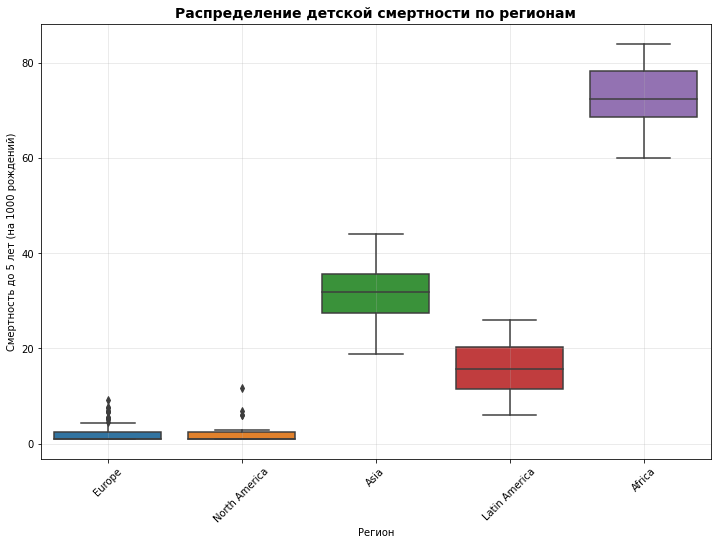

In [8]:
# Анализ распределения детской смертности по регионам

plt.figure(figsize=(12, 8))

sns.boxplot(data=df, x='Region', y='Under5_Mortality_Rate')
plt.title('Распределение детской смертности по регионам', fontsize=14, fontweight='bold')
plt.xlabel('Регион')
plt.ylabel('Смертность до 5 лет (на 1000 рождений)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

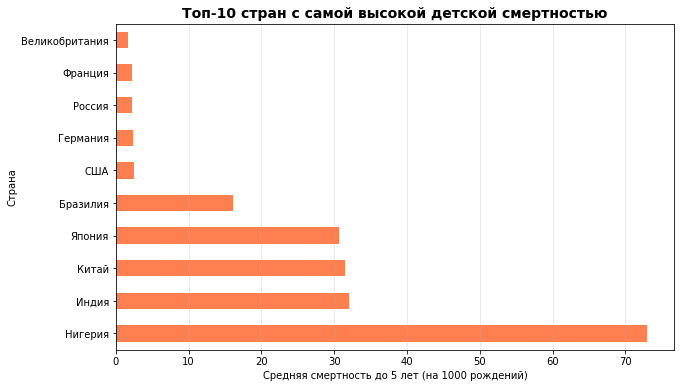

In [9]:
# Топ-10 стран с самой высокой смертностью
top_mortality = df.groupby('Country')['Under5_Mortality_Rate'].mean().sort_values(ascending=False).head(10)

country_translation = {
    'Russia': 'Россия',
    'USA': 'США', 
    'Germany': 'Германия',
    'France': 'Франция',
    'UK': 'Великобритания',
    'Japan': 'Япония',
    'China': 'Китай',
    'India': 'Индия',
    'Brazil': 'Бразилия',
    'Nigeria': 'Нигерия'
}

top_mortality_ru = top_mortality.rename(index=country_translation)

plt.figure(figsize=(10, 6))
top_mortality_ru.plot(kind='barh', color='coral')
plt.title('Топ-10 стран с самой высокой детской смертностью', fontsize=14, fontweight='bold')
plt.xlabel('Средняя смертность до 5 лет (на 1000 рождений)')
plt.ylabel('Страна')
plt.grid(axis='x', alpha=0.3)
plt.show()

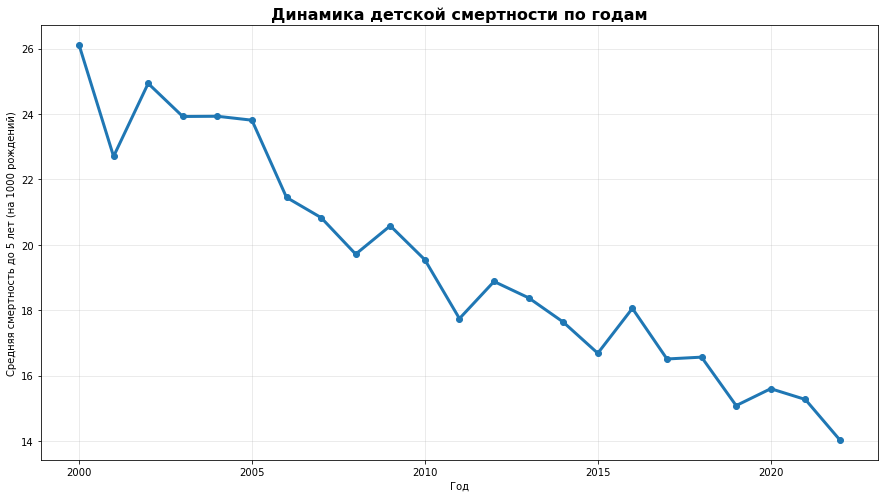

In [10]:
# Динамика смертности по годам
plt.figure(figsize=(15, 8))

mortality_by_year = df.groupby('Year')['Under5_Mortality_Rate'].mean()

plt.plot(mortality_by_year.index, mortality_by_year.values, linewidth=3, marker='o')
plt.title('Динамика детской смертности по годам', fontsize=16, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Средняя смертность до 5 лет (на 1000 рождений)')
plt.grid(True, alpha=0.3)
plt.show()

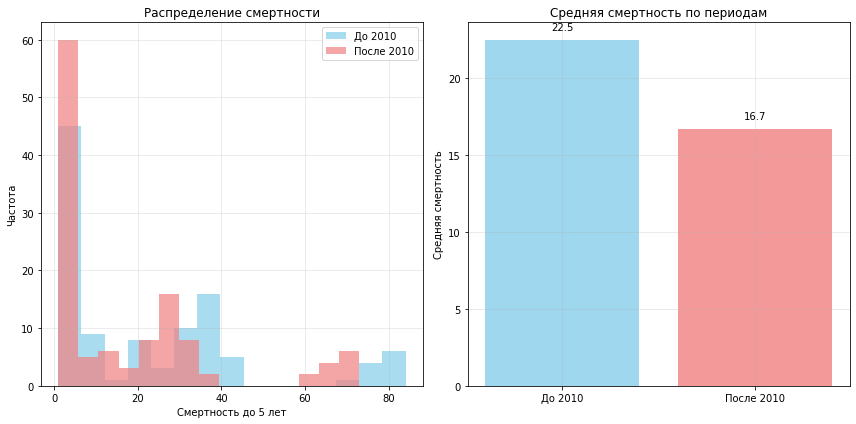

T-статистика: 1.9525
P-значение: 0.0521
Нет статистически значимого различия между периодами


In [11]:
# Сравнение смертности до и после 2010 года
plt.figure(figsize=(12, 6))

df_before_2010 = df[df['Year'] <= 2010]['Under5_Mortality_Rate'].dropna()
df_after_2010 = df[df['Year'] > 2010]['Under5_Mortality_Rate'].dropna()


plt.subplot(1, 2, 1)
plt.hist(df_before_2010, alpha=0.7, label='До 2010', bins=15, color='skyblue')
plt.hist(df_after_2010, alpha=0.7, label='После 2010', bins=15, color='lightcoral')
plt.xlabel('Смертность до 5 лет')
plt.ylabel('Частота')
plt.legend()
plt.title('Распределение смертности')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
periods = ['До 2010', 'После 2010']
means = [df_before_2010.mean(), df_after_2010.mean()]
bars = plt.bar(periods, means, color=['skyblue', 'lightcoral'], alpha=0.8)
plt.ylabel('Средняя смертность')
plt.title('Средняя смертность по периодам')
plt.grid(alpha=0.3)
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            f'{mean:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# T-тест для сравнения средних
t_stat, p_value = ttest_ind(df_before_2010, df_after_2010, nan_policy='omit')
print(f"T-статистика: {t_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05: 
    print("Статистически значимое различие между периодами")
else:
    print("Нет статистически значимого различия между периодами")

In [13]:
# Доверительный интервал для средней смертности
confidence = 0.95
fatalities = df['Under5_Mortality_Rate'].dropna()
ci_low, ci_high = stats.t.interval(confidence, len(fatalities)-1, 
                                    loc=fatalities.mean(), 
                                    scale=stats.sem(fatalities))
print("ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ:")
print(f"95% доверительный интервал для средней смертности: [{ci_low:.2f}, {ci_high:.2f}]")
print(f"Средняя смертность: {fatalities.mean():.2f}")

ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ:
95% доверительный интервал для средней смертности: [16.51, 22.38]
Средняя смертность: 19.44


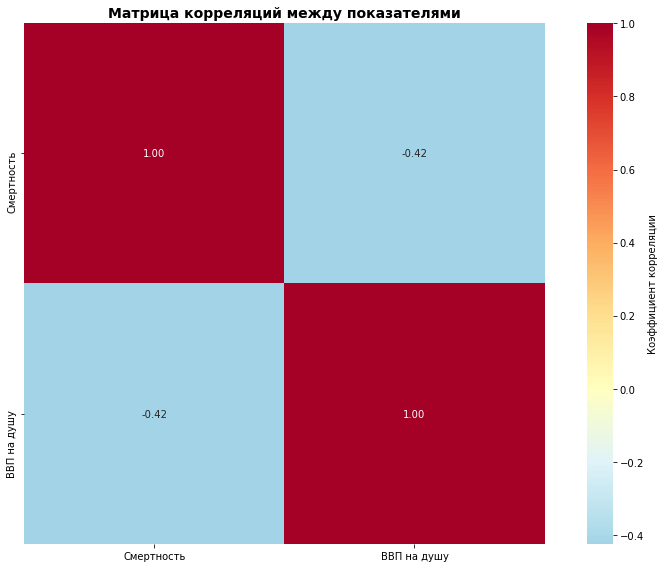

ТАБЛИЦА КОРРЕЛЯЦИЙ:
             Смертность  ВВП на душу
Смертность        1.000       -0.424
ВВП на душу      -0.424        1.000


In [14]:
# Корреляция между показателями
plt.figure(figsize=(12, 8))

correlation_matrix = df[['Under5_Mortality_Rate', 'GDP_per_Capita', 
                        'Healthcare_Spending', 'Literacy_Rate']].corr()
corr_ru = correlation_matrix.rename(
    columns={
        'Under5_Mortality_Rate': 'Смертность',
        'GDP_per_Capita': 'ВВП на душу',
        'Healthcare_Spending': 'Расходы на здравоохранение',
        'Literacy_Rate': 'Уровень грамотности'
    },
    index={
        'Under5_Mortality_Rate': 'Смертность',
        'GDP_per_Capita': 'ВВП на душу',
        'Healthcare_Spending': 'Расходы на здравоохранение', 
        'Literacy_Rate': 'Уровень грамотности'
    }
)

sns.heatmap(corr_ru, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Коэффициент корреляции'})
plt.title('Матрица корреляций между показателями', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("ТАБЛИЦА КОРРЕЛЯЦИЙ:")
print(corr_ru.round(3))

После очистки данных осталось 224 строк


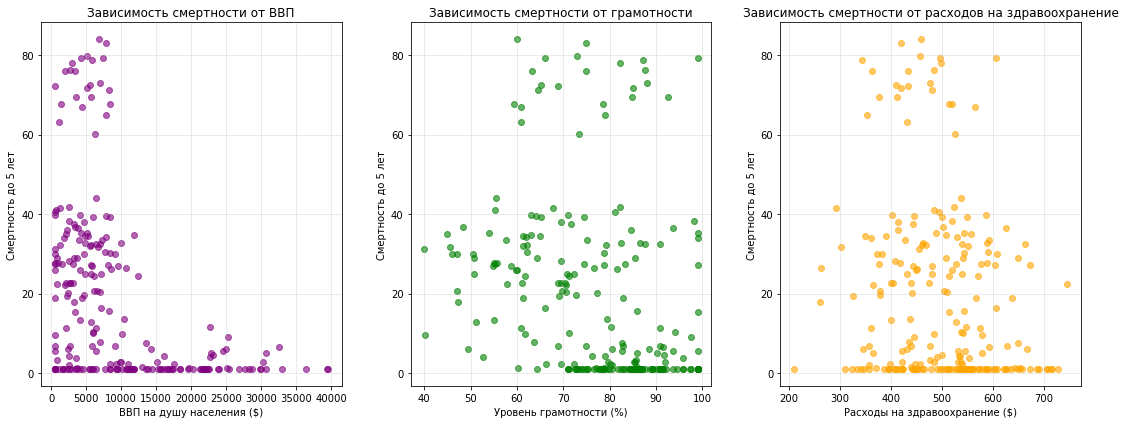

Корреляция с ВВП: -0.4246, p-value: 0.0000
Статистически значимая корреляция с ВВП
Корреляция с грамотностью: -0.3006, p-value: 0.0000
Статистически значимая корреляция с грамотностью
Корреляция с расходами на здравоохранение: -0.1788, p-value: 0.0073
Статистически значимая корреляция с расходами на здравоохранение


In [15]:
# Влияние экономических и социальных факторов на смертность
plt.figure(figsize=(16, 6))

# Преобразуем колонки к числовому типу, игнорируя ошибки
df_clean = df.copy()
df_clean['GDP_per_Capita'] = pd.to_numeric(df_clean['GDP_per_Capita'], errors='coerce')
df_clean['Literacy_Rate'] = pd.to_numeric(df_clean['Literacy_Rate'], errors='coerce')
df_clean['Healthcare_Spending'] = pd.to_numeric(df_clean['Healthcare_Spending'], errors='coerce')
df_clean['Under5_Mortality_Rate'] = pd.to_numeric(df_clean['Under5_Mortality_Rate'], errors='coerce')

# Удаляем пропущенные значения
df_clean = df_clean.dropna(subset=['GDP_per_Capita', 'Under5_Mortality_Rate', 
                                  'Literacy_Rate', 'Healthcare_Spending'])

print(f"После очистки данных осталось {len(df_clean)} строк")

plt.subplot(1, 3, 1)
plt.scatter(df_clean['GDP_per_Capita'], df_clean['Under5_Mortality_Rate'], alpha=0.6, color='purple')
plt.xlabel('ВВП на душу населения ($)')
plt.ylabel('Смертность до 5 лет')
plt.title('Зависимость смертности от ВВП')
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(df_clean['Literacy_Rate'], df_clean['Under5_Mortality_Rate'], alpha=0.6, color='green')
plt.xlabel('Уровень грамотности (%)')
plt.ylabel('Смертность до 5 лет')
plt.title('Зависимость смертности от грамотности')
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(df_clean['Healthcare_Spending'], df_clean['Under5_Mortality_Rate'], alpha=0.6, color='orange')
plt.xlabel('Расходы на здравоохранение ($)')
plt.ylabel('Смертность до 5 лет')
plt.title('Зависимость смертности от расходов на здравоохранение')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Статистическая значимость корреляции
try:
    corr_gdp, p_gdp = stats.pearsonr(df_clean['GDP_per_Capita'], df_clean['Under5_Mortality_Rate'])
    print(f"Корреляция с ВВП: {corr_gdp:.4f}, p-value: {p_gdp:.4f}")
    if p_gdp < 0.05:
        print("Статистически значимая корреляция с ВВП")
    else:
        print("Нет статистически значимой корреляции с ВВП")
except Exception as e:
    print(f"Ошибка в корреляции с ВВП: {e}")

try:
    corr_literacy, p_literacy = stats.pearsonr(df_clean['Literacy_Rate'], df_clean['Under5_Mortality_Rate'])
    print(f"Корреляция с грамотностью: {corr_literacy:.4f}, p-value: {p_literacy:.4f}")
    if p_literacy < 0.05:
        print("Статистически значимая корреляция с грамотностью")
    else:
        print("Нет статистически значимой корреляции с грамотностью")
except Exception as e:
    print(f"Ошибка в корреляции с грамотностью: {e}")

try:
    corr_health, p_health = stats.pearsonr(df_clean['Healthcare_Spending'], df_clean['Under5_Mortality_Rate'])
    print(f"Корреляция с расходами на здравоохранение: {corr_health:.4f}, p-value: {p_health:.4f}")
    if p_health < 0.05:
        print("Статистически значимая корреляция с расходами на здравоохранение")
    else:
        print("Нет статистически значимой корреляции с расходами на здравоохранение")
except Exception as e:
    print(f"Ошибка в корреляции с расходами на здравоохранение: {e}")